<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Organ-manual-/semi-manual-sub-sampling" data-toc-modified-id="Organ-manual-/semi-manual-sub-sampling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Organ manual /semi manual sub sampling</a></span></li><li><span><a href="#Create-texture-SKlearn-shit-approach" data-toc-modified-id="Create-texture-SKlearn-shit-approach-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create texture SKlearn shit approach</a></span></li><li><span><a href="#Manual-organ-to-organ-comparison" data-toc-modified-id="Manual-organ-to-organ-comparison-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Manual organ to organ comparison</a></span></li><li><span><a href="#Manual-organ-to-organ-comparison" data-toc-modified-id="Manual-organ-to-organ-comparison-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Manual organ to organ comparison</a></span></li><li><span><a href="#Grey-level-quantization-from-256-to-32-bit-level" data-toc-modified-id="Grey-level-quantization-from-256-to-32-bit-level-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Grey level quantization from 256 to 32 bit level</a></span></li><li><span><a href="#Patch-extraction-function" data-toc-modified-id="Patch-extraction-function-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Patch extraction function</a></span></li><li><span><a href="#Extracting-patches-from-image" data-toc-modified-id="Extracting-patches-from-image-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Extracting patches from image</a></span><ul class="toc-item"><li><span><a href="#Extracting-background-patches-for-analysis" data-toc-modified-id="Extracting-background-patches-for-analysis-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Extracting background patches for analysis</a></span></li></ul></li><li><span><a href="#Generate-GCLM-information." data-toc-modified-id="Generate-GCLM-information.-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Generate GCLM information.</a></span></li><li><span><a href="#Get-file-information-from-file-name-." data-toc-modified-id="Get-file-information-from-file-name-.-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Get file information from file name .</a></span></li><li><span><a href="#Distance-metrics-functions" data-toc-modified-id="Distance-metrics-functions-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Distance metrics functions</a></span></li><li><span><a href="#Iterating-analysis-through-patches" data-toc-modified-id="Iterating-analysis-through-patches-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Iterating analysis through patches</a></span></li><li><span><a href="#GCLM-patch-generation" data-toc-modified-id="GCLM-patch-generation-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>GCLM patch generation</a></span></li><li><span><a href="#Measure-Bhattcharrya-distance-between-values" data-toc-modified-id="Measure-Bhattcharrya-distance-between-values-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Measure Bhattcharrya distance between values</a></span></li></ul></div>

In [241]:
import os 
import cv2 
import pandas as pd
import numpy as np
import imageio
import matplotlib.pyplot as plt 
from skimage.feature import greycomatrix, greycoprops
import seaborn as sns
from sklearn.feature_extraction import image
import random
from scipy.spatial import distance
import itertools
import math
from numba import jit
from PIL import Image

In [3]:
os.chdir(r'C:\Users\niall\OneDrive\Documents\Data science masters\Thesis\Results\EDA\gnrl_info')

In [4]:
gnrl_info=pd.read_excel('gnrl_raw_data_info.xlsx')

In [5]:
gnrl_info_spec=gnrl_info[['Person_id','Slice_id','File_location','Image_type','MR_modes']]


## Organ manual /semi manual sub sampling 

In [307]:
file_list_real='/home/ubuntu/projects/Texture GCLM/data/22/'
file_list_abs_T2spir_grnd=[]
file_list_abs_T2spir_real=[]
file_list_abs_T1dual_grnd=[]
file_list_abs_T1dual_inphase_real=[]
file_list_abs_T1dual_outphase_real=[]


for subdir,dirs,file_list in os.walk(file_list_real):
    print(subdir)
    try:
        os.path.isfile(file[0])
        for file in file_list:
            if subdir.find('Ground')!=-1 and subdir.find('T1DUAL')!=-1:
                file_list_abs_T1dual_grnd.append(os.path.join(subdir,file))
            elif subdir.find('Ground')!=-1 and subdir.find('T2SPIR')!=-1:
                file_list_abs_T2spir_grnd.append(os.path.join(subdir,file))
            elif subdir.find('InPhase')!=-1 and subdir.find('T1DUAL')!=-1:
                file_list_abs_T1dual_inphase_real.append(os.path.join(subdir,file))
            elif subdir.find('OutPhase')!=-1 and subdir.find('T1DUAL')!=-1:
                file_list_abs_T1dual_outphase_real.append(os.path.join(subdir,file))
            elif subdir.find('DICOM_anon')!=-1 and subdir.find('T2SPIR')!=-1:
                file_list_abs_T2spir_real.append(os.path.join(subdir,file))
            else:
                print('file not found:',file)
        
    except IndexError as e:
        print(' No files in directory: ',subdir)

file_list_abs_T2spir_grnd=sorted(file_list_abs_T2spir_grnd)
file_list_abs_T2spir_real=sorted(file_list_abs_T2spir_real)
file_list_abs_T1dual_grnd=sorted(file_list_abs_T1dual_grnd)
file_list_abs_T1dual_inphase_real=sorted(file_list_abs_T1dual_inphase_real)
file_list_abs_T1dual_outphase_real=sorted(file_list_abs_T1dual_outphase_real)
        
    

/home/ubuntu/projects/Texture GCLM/data/1/
/home/ubuntu/projects/Texture GCLM/data/1/T2SPIR
/home/ubuntu/projects/Texture GCLM/data/1/T2SPIR/DICOM_anon
/home/ubuntu/projects/Texture GCLM/data/1/T2SPIR/Ground
/home/ubuntu/projects/Texture GCLM/data/1/T1DUAL
/home/ubuntu/projects/Texture GCLM/data/1/T1DUAL/DICOM_anon
/home/ubuntu/projects/Texture GCLM/data/1/T1DUAL/DICOM_anon/OutPhase
/home/ubuntu/projects/Texture GCLM/data/1/T1DUAL/DICOM_anon/InPhase
/home/ubuntu/projects/Texture GCLM/data/1/T1DUAL/Ground


In [496]:
idx_slc=20

trl_img_T1dual_grnd=imageio.imread(file_list_abs_T1dual_grnd[idx_slc])
trl_img_T1dual_grnd_fname=os.path.splitext(os.path.basename(file_list_abs_T1dual_grnd[idx_slc]))[0]

trl_img_T2SPIR_grnd=imageio.imread(file_list_abs_T2spir_grnd[idx_slc])
trl_img_T2SPIR_grnd_fname=os.path.splitext(os.path.basename(file_list_abs_T2spir_grnd[idx_slc]))[0]

trl_img_T2SPIR_real=imageio.imread(file_list_abs_T2spir_real[idx_slc])
trl_img_T2SPIR_real_fname=os.path.splitext(os.path.basename(file_list_abs_T2spir_real[idx_slc]))[0]

trl_img_T1dual_inphase_real=imageio.imread(file_list_abs_T1dual_inphase_real[idx_slc])
trl_img_T1dual_inphase_real_fname=os.path.splitext(os.path.basename(file_list_abs_T1dual_inphase_real[idx_slc]))[0]

trl_img_T1dual_outphase_real=imageio.imread(file_list_abs_T1dual_outphase_real[idx_slc])
trl_img_T1dual_outphase_real_fname=os.path.splitext(os.path.basename(file_list_abs_T1dual_outphase_real[idx_slc]))[0]

In [497]:
def get_mask_patch_arrays(trl_img_grnd,trl_img_real):
    
    contours,hierarchy =cv2.findContours(trl_img_grnd,
                                         cv2.RETR_LIST,
                                         cv2.CHAIN_APPROX_SIMPLE)
    mask_intensities={0:'Background',63:'Liver',126:'r_kidney',189:'l_kidney',252:'spleen'}
    grnd_dict={}
    act_dict={}
    for vals in contours:
        x, y, w, h= cv2.boundingRect(vals)
        
        trl_array=np.unique(trl_img_grnd[y:y+h,x:x+w])
        print(trl_array)
        name_str=''
        
        for vals in trl_array:
            name_str=name_str+'_'+mask_intensities[vals]
            
        grnd_dict[name_str]=trl_img_grnd[y:y+h,x:x+w]
        act_dict[name_str]=trl_img_real[y:y+h,x:x+w]
        
    return (grnd_dict,act_dict)

In [514]:
grnd_patch,img_patch=get_mask_patch_arrays(trl_img_T1dual_grnd,trl_img_T1dual_inphase_real)

[  0 189]
[  0  63 126]
[  0 252]
[  0  63 126]


In [ ]:
plt.imshow(trl_img_T1dual_grnd[100:150,103:150])

In [515]:
write_img(trl_img_T1dual_inphase_real_fname,
          'background',
          't1dual_inphase.png',
          trl_img_T1dual_inphase_real[100:150,103:150])


In [426]:
def write_img(file_name,organ_name,file_src,img_array):
    
    plt.imsave(organ_name+file_name+file_src,img_array)

In [ ]:
plt.imshow(grnd_patch['_Background_l_kidney'][5:15,2:25])
np.unique(grnd_patch['_Background_l_kidney'][5:15,2:25])

In [516]:
write_img(trl_img_T1dual_inphase_real_fname,
          'l_kidney',
          't1dual_inphase.png',
          img_patch['_Background_l_kidney'][5:15,2:25])

In [ ]:
plt.imshow(grnd_patch['_Background_Liver_r_kidney'][20:43,3:35])
np.unique(grnd_patch['_Background_Liver_r_kidney'][20:43,3:35])

In [517]:
write_img(trl_img_T1dual_inphase_real_fname,
          'liver',
          't1dual_inphase.png',
          img_patch['_Background_Liver_r_kidney'][20:43,3:35])

In [ ]:
plt.imshow(grnd_patch['_Background_Liver_r_kidney'][56:,20:])
np.unique(grnd_patch['_Background_Liver_r_kidney'][56:,20:])

In [518]:
write_img(trl_img_T1dual_inphase_real_fname,
          '_r_kidney',
          't1dual_inphase.png',
          img_patch['_Background_Liver_r_kidney'][56:,20:])

In [ ]:
plt.imshow(grnd_patch['_Background_spleen'][5:21,2:8])

In [519]:
write_img(trl_img_T1dual_inphase_real_fname,
          '_spleen',
          't1dual_inphase.png',
          img_patch['_Background_spleen'][5:21,2:8])

In [314]:
mask_intensities={0:'Background',63:'Liver',126:'r_kidney',189:'l_kidney',252:'spleen'}

In [210]:
bnd_arr_1=bnd_arrays[0][2:13,4:28]
bnd_arr_2=bnd_arrays[1][10:33,8:30]
bnd_arr_3=bnd_arrays[2][6:20,3:9]
bnd_arr_4=bnd_arrays[3][10:35,8:35]
np.unique(bnd_arr_4)

Image([63], dtype=uint8)

## Create texture SKlearn shit approach



In [5]:
patch_sizes=[3,5]
offset=[[0],[1],[2]]
unused_angles=[180,225,270,315,360]
angles=[0,45,90,135]
#Radians values for grey co-occurence matrix. 
angles_radian=[(angs*np.pi)/180 for angs in angles]

In [6]:
def gen_texture_img(img,offset,angles,patch_size):
    """The purpose of this method is to generate texture images wrt to different input parameters of the process"""
    
    patch_set = image.extract_patches_2d(img, (patch_size, patch_size))
    
    #Produce texture image mask to fill
    text_img_dim=patch_set.shape[0]/2
    text_img_mask=None

    for patch_no in range(0,patch_set.shape[0]):
        tmp_patch=patch_set[patch_no,:,:]
        
        grey_co_mat_cmds={'offset':offset,
             'angles':[angles],
             'levels':256,
             'symmetric':True,
             'normalised':True}
        #ipdb.set_trace()
        tmp_patch_gclm=gen_gclm(tmp_patch,**grey_co_mat_cmds)
        #Defining indexing for inputing final image texture value
        tmp_gclm_stats=np.array(gen_gclm_stats(tmp_patch_gclm))
        tmp_gclm_stat_reshape=tmp_gclm_stats.reshape((1,1,6))
        if type(text_img_mask)==type(None):
            text_img_mask=tmp_gclm_stat_reshape
        else:
            text_img_mask=np.concatenate((text_img_mask,tmp_gclm_stat_reshape),axis=0)
                                         
    return text_img_mask
    #Generating texture image


In [7]:
imgs_modes=['t1dual','t2spir','inphase','outphase','dicom_anon','ground']

file_dict={}
for subdir,root,files in os.walk(os.getcwd()):

    if len(files)!=0:
        gt_img_name=[]
        gt_img_name=[''.join(x) for x in imgs_modes if x in subdir.lower()]
        #If two categories 
        if len(gt_img_name)>1:
            
            tmp_file_lst=[os.path.join(subdir,file) for file in files]
            seperator = '_'
            seperator =seperator.join(gt_img_name)
            file_dict[seperator]=sorted(tmp_file_lst)


In [331]:
file_dict['t2spir_dicom_anon'][18]

'C:\\Users\\niall\\OneDrive\\Documents\\Data science masters\\Thesis\\Biomedical images\\CHAOS_Train_Sets\\unpreproc\\MR\\1\\T2SPIR\\DICOM_anon\\IMG-0002-00019.dcm'

In [344]:
cd grey_lvls

C:\Users\niall\OneDrive\Documents\Data science masters\Thesis\Biomedical images\CHAOS_Train_Sets\unpreproc\MR\1\grey_lvls


In [ ]:
PIL_methods=[0,1,2]
k_means=[0,1]
grey_lvls=[16,32,64,128]

final_concat_df=None
#Iterating through images in file source 
for img_type,img_srcs in file_dict.items():
    
    if img_type.find('dicom_anon')!=-1:
        #iterating through image sources
        for val in img_srcs:
            #Getting image for analysis
            tmp_img_256=bytescaling(imageio.imread(val))
            
            summ_df,img_return_arr=assess_gry_lvl_meth(PIL_methods,k_means,grey_lvls,tmp_img_256)
            
            file_split_name=os.path.basename(val)
            
            file_name=os.path.splitext(file_split_name)[0]+'_'+img_type+'_'+'grey_levels'
            summ_df['file_name']=file_split_name
            summ_df['img_type']=img_type
            
            if final_concat_df is None:
                final_concat_df=summ_df
            else:
                final_concat_df=final_concat_df.append(summ_df,ignore_index=True)
            
            np.save(file_name,img_return_arr)
            
            
            
        

In [364]:
final_concat_df.to_excel('Pat1_grey_lvl_MAE_analysis_allimgtypes.xlsx')

In [366]:
trial_arr=np.load('IMG-0002-00019_t2spir_dicom_anon_grey_levels.npy')
trial_arr.shape

(256, 256, 28)

In [367]:
np.unique(trial_arr[:,:,0])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16],
      dtype=uint8)

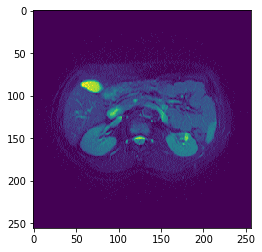

In [368]:
plt.imshow(trial_arr[:,:,0])

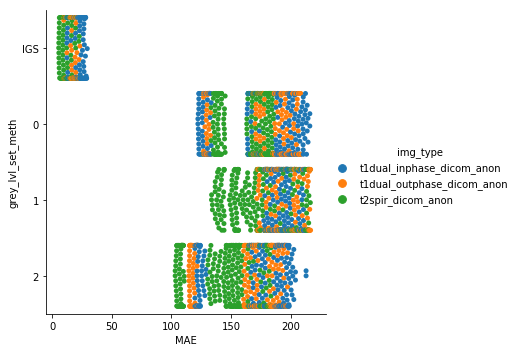

In [354]:
sns.catplot(x='MAE', y='grey_lvl_set_meth', hue='img_type', kind="swarm", data=final_concat_df);

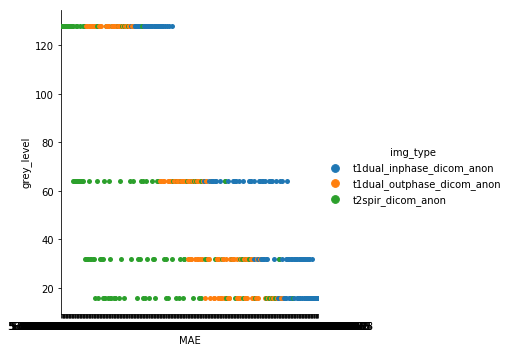

In [355]:
sns.catplot(x='MAE', y='grey_level', hue='img_type', kind="swarm",
            data=final_concat_df.loc[final_concat_df['grey_lvl_set_meth']=='IGS',:]);

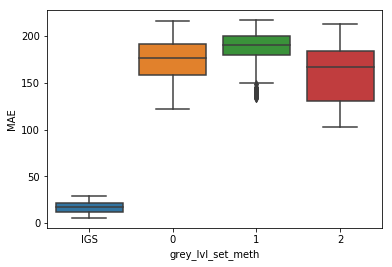

In [350]:
ax1=sns.boxplot(x='grey_lvl_set_meth',y='MAE',data=final_concat_df)

<Figure size 1440x1440 with 0 Axes>

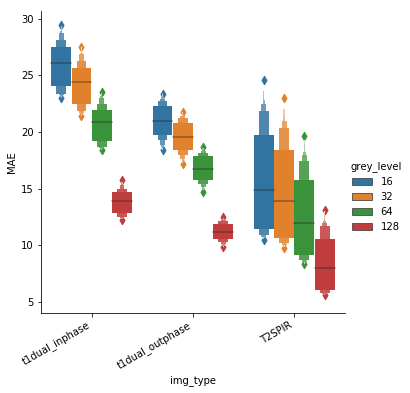

In [361]:
plt.figure(figsize=(20,20))
ax1=sns.catplot(x='img_type',y='MAE',hue='grey_level',kind='boxen',
                data=final_concat_df.loc[final_concat_df['grey_lvl_set_meth']=='IGS',:])
ax1.set_xticklabels(['t1dual_inphase','t1dual_outphase','T2SPIR'],rotation=30, ha='right')

In [336]:

def assess_gry_lvl_meth(PIL_methods,k_means,grey_lvls,tmp_img_256):
    """The purpose of this method is to perform gray level setting for image."""
    
    final_arr=[]
    img_arr=None
    tmp_img_PIL_256=Image.fromarray(tmp_img_256)
    
    for grey_l in grey_lvls:
            #IGS quantisation
            IGS_tmp=quantize_igs(tmp_img_256, grey_l, qtype='igs', maxCount=255, displayLevels=None)
            #Calc dist metrics
            tmp_mse,tmp_mae=mse_mae_arr_based(tmp_img_256, IGS_tmp)

            #Cal tmp dist metrics
            tmp_key=['N/A',grey_l,'IGS',tmp_mse,tmp_mae]
            #Get final array values
            final_arr.append(tmp_key)

            if img_arr is None:
                img_arr=IGS_tmp
            else:
                img_arr=np.dstack((img_arr,IGS_tmp))
                
            final_arr,img_arr=PIL_grey_lvl_set(tmp_img_PIL_256,k_means,PIL_methods,
                                               grey_l,img_arr,final_arr)


    #Summary dataframe of results in grey level quantisation
    summary_df=pd.DataFrame(final_arr,columns=['kmean_act','grey_level','grey_lvl_set_meth','MSE','MAE'])
    
    return (summary_df,img_arr)

In [293]:
def PIL_grey_lvl_set(tmp_img_PIL_256,kmean_mth,PIL_mth,grey_l,img_arr,final_arr):
    """PIL best method for analysis of grey level setting quantization"""
    tmp_img_256=np.array(tmp_img_PIL_256)
    
    for km in kmean_mth:
        
        for meth in PIL_mth:
            
            tmp_img=np.array(tmp_img_PIL_256.quantize(colors=grey_l, method=meth, kmeans=km))

            tmp_mse,tmp_mae=mse_mae_arr_based(tmp_img_256, tmp_img)

            tmp_key=[km,grey_l,meth,tmp_mse,tmp_mae]

            img_arr=np.dstack((img_arr,tmp_img))
            #Appending final array temporary keys
            final_arr.append(tmp_key)
            
    return (final_arr,img_arr)

In [397]:
def offset(length, angle):
    """Return the offset in pixels for a given length and angle"""
    dv = length * np.sign(-np.sin(angle)).astype(np.int32)
    dh = length * np.sign(np.cos(angle)).astype(np.int32)
    return dv, dh

def crop(img, center, win):
    """Return a square crop of img centered at center (side = 2*win + 1)"""
    row, col = center
    side = 2*win + 1
    first_row = row - win
    first_col = col - win
    last_row = first_row + side    
    last_col = first_col + side
    return img[first_row: last_row, first_col: last_col]

def cooc_maps(img, center, win, d=[1], theta=[0], levels=256):
    """
    Return a set of co-occurrence maps for different d and theta in a square 
    crop centered at center (side = 2*w + 1)
    """
    shape = (2*win + 1, 2*win + 1, len(d), len(theta))
    cooc = np.zeros(shape=shape, dtype=np.int32)
    row, col = center
    Ii = crop(img, (row, col), win)
    for d_index, length in enumerate(d):
        for a_index, angle in enumerate(theta):
            dv, dh = offset(length, angle)
            Ij = crop(img, center=(row + dv, col + dh), win=win)
            cooc[:, :, d_index, a_index] = encode_cooccurrence(Ii, Ij, levels)
    return cooc

def encode_cooccurrence(x, y, levels=256):
    """Return the code corresponding to co-occurrence of intensities x and y"""
    return x*levels + y

def decode_cooccurrence(code, levels=256):
    """Return the intensities x, y corresponding to code"""
    return code//levels, np.mod(code, levels)    

def compute_glcms(cooccurrence_maps, levels=256):
    """Compute the cooccurrence frequencies of the cooccurrence maps"""
    Nr, Na = cooccurrence_maps.shape[2:]
    glcms = np.zeros(shape=(levels, levels, Nr, Na), dtype=np.float64)
    for r in range(Nr):
        for a in range(Na):
            table = stats.itemfreq(cooccurrence_maps[:, :, r, a])
            codes = table[:, 0]
            freqs = table[:, 1]/float(table[:, 1].sum())
            i, j = decode_cooccurrence(codes, levels=levels)
            glcms[i, j, r, a] = freqs
    return glcms

def compute_props(glcms, props=('contrast',)):
    """Return a feature vector corresponding to a set of GLCM"""
    Nr, Na = glcms.shape[2:]
    features = np.zeros(shape=(Nr, Na, len(props)))
    for index, prop_name in enumerate(props):
        features[:, :, index] = greycoprops(glcms, prop_name)
    return features.ravel()

def haralick_features(img, win, d, theta, levels, props):
    """Return a map of Haralick features (one feature vector per pixel)"""
    rows, cols = img.shape
    margin = win + max(d)
    arr = np.pad(img, margin, mode='reflect')
    n_features = len(d) * len(theta) * len(props)
    feature_map = np.zeros(shape=(rows, cols, n_features), dtype=np.float64)
    for m in range(rows):
        
        for n in range(cols):
            coocs = cooc_maps(arr, (m + margin, n + margin), win, d, theta, levels)
            glcms = compute_glcms(coocs, levels)
            feature_map[m, n, :] = compute_props(glcms, props)
    return feature_map

In [373]:
file_list=os.listdir()
file_list[19:26]

['IMG-0002-00020_t2spir_dicom_anon_grey_levels.npy',
 'IMG-0002-00021_t2spir_dicom_anon_grey_levels.npy',
 'IMG-0002-00022_t2spir_dicom_anon_grey_levels.npy',
 'IMG-0002-00023_t2spir_dicom_anon_grey_levels.npy',
 'IMG-0002-00024_t2spir_dicom_anon_grey_levels.npy',
 'IMG-0002-00025_t2spir_dicom_anon_grey_levels.npy',
 'IMG-0002-00026_t2spir_dicom_anon_grey_levels.npy']

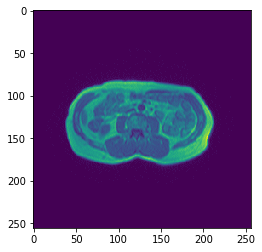

In [393]:
trl_go=np.load(file_iter_list[10])
plt.imshow(trl_go[:,:,7])

In [399]:
file_iter_list=file_list[19:26]+file_list[54:70]
file_iter_list

['IMG-0002-00020_t2spir_dicom_anon_grey_levels.npy',
 'IMG-0002-00021_t2spir_dicom_anon_grey_levels.npy',
 'IMG-0002-00022_t2spir_dicom_anon_grey_levels.npy',
 'IMG-0002-00023_t2spir_dicom_anon_grey_levels.npy',
 'IMG-0002-00024_t2spir_dicom_anon_grey_levels.npy',
 'IMG-0002-00025_t2spir_dicom_anon_grey_levels.npy',
 'IMG-0002-00026_t2spir_dicom_anon_grey_levels.npy',
 'IMG-0004-00019_t1dual_outphase_dicom_anon_grey_levels.npy',
 'IMG-0004-00020_t1dual_inphase_dicom_anon_grey_levels.npy',
 'IMG-0004-00021_t1dual_outphase_dicom_anon_grey_levels.npy',
 'IMG-0004-00022_t1dual_inphase_dicom_anon_grey_levels.npy',
 'IMG-0004-00023_t1dual_outphase_dicom_anon_grey_levels.npy',
 'IMG-0004-00024_t1dual_inphase_dicom_anon_grey_levels.npy',
 'IMG-0004-00025_t1dual_outphase_dicom_anon_grey_levels.npy',
 'IMG-0004-00026_t1dual_inphase_dicom_anon_grey_levels.npy',
 'IMG-0004-00027_t1dual_outphase_dicom_anon_grey_levels.npy',
 'IMG-0004-00028_t1dual_inphase_dicom_anon_grey_levels.npy',
 'IMG-0004-000

In [9]:
trl_str='F:\Biomedical images\Train\MR'
idx_1=trl_str.rfind('MR')
trl_s2=trl_str[:idx_1]
dst_path=os.path.join(trl_s2,'MR\1')

In [10]:
os.chdir(dst_path)

OSError: [WinError 123] The filename, directory name, or volume label syntax is incorrect: 'F:\\Biomedical images\\Train\\MR\x01'

In [5]:
import os

In [ ]:
d = (1,2,3) 
theta = (0, np.pi/4, np.pi/2, 3*np.pi/4)
props = ('contrast', 'homogeneity','dissimilarity','energy','correlation','ASM')
levels = 16
windows = (11,9,7,5,3)#5,3

#for file_type,file_list in file_dict.items():
    
    #if file_type.find('dicom')!=-1:
file_type='t2spir'        

#midl_idx=round(len(file_list)/2)
#Iterate through middle files for generating text file for analysis
for file in file_iter_list:
    
    tmp_file=np.load(file)
    
    file_name_ext=os.path.splitext(file)[0]
    print('File processing wip',file_name_ext)
    for win in windows:

        tmp_img = tmp_file[:,:,0]#tmp_img_256#imageio.imread(file)

        trl_img_stack=haralick_features(tmp_img, win, d, theta, levels, props)

        #file_name='text_img_win_pat_id_1_'+str(win)+'_'+file_type+'_'+os.path.splitext(os.path.basename(file))[0]
        file_name='text_img_pat_id_1_win_'+str(win)+'_16lvl_'+file_name_ext
        np.save(file_name,trl_img_stack,allow_pickle=True)
                

In [334]:
np.save('text_img_win_pat_id_1_wind_5_T2SPIR_32lvl_IMG-0002-00019',trl_img_stack,allow_pickle=True)

## Manual organ to organ comparison 

In [780]:
file_analysis=os.listdir()
file_combo_analysis=list(itertools.combinations(file_analysis,2))
org_names=['background','liver','l_kidney','r_kidney','spleen']
windows=['win_5','win_3']
#Org information
distances = (1,2,3)
theta = (0, np.pi/4, np.pi/2, 3*np.pi/4)
props = ('contrast', 'homogeneity','dissimilarity','energy','correlation','ASM')

file_info_from_name=[org_names,windows]
final_list_data=[]
for combinations in file_combo_analysis:
    
    if combinations[0]==combinations[1]:
        analysis_type='inter'
    else:
        analysis_type='org_to_org_comparison'
    
    #Getting organ name from file
    file_1_info=get_file_info_name(combinations[0],
                                   file_info_from_name)
    file_2_info=get_file_info_name(combinations[1],
                                   file_info_from_name)
    if file_2_info[1]==file_1_info[1]:
        #ipdb.set_trace()
        file_1_arr=np.load(combinations[0])
        file_2_arr=np.load(combinations[1])
        
        #Getting organs and window size 
        organs=[file_1_info[0],file_2_info[0]]
        window=file_1_info[1]
        #Generating file information 
        org_comp_data=analyze_patches(file_1_arr,file_2_arr,
                                      distances,theta,props,window,organs)
        final_list_data=final_list_data+org_comp_data
    

In [ ]:
texture_files=[file_name,'pass']#os.listdir()

org_names=['background','liver','l_kidney','r_kidney','spleen']
file_combo_analysis=list(itertools.combinations(org_names,2))
windows=['win_5','win_3']
#Org information
distances = (1,2,3)
theta = (0, np.pi/4, np.pi/2, 3*np.pi/4)
props = ('contrast', 'homogeneity','dissimilarity','energy','correlation','ASM')

file_info_from_name=[windows]
final_list_data=[]
for files in texture_files:
    ipdb.set_trace()
    #Getting organ name from file
    file_1_info=get_file_info_name(files,
                                   file_info_from_name)
    #ipdb.set_trace()
    file_1_arr=np.load(files)

    window=file_1_info[1]
    #Generating file information 
    org_comp_data=analyze_patches(file_1_arr,file_2_arr,
                                  distances,theta,props,window,organs)
    final_list_data=final_list_data+org_comp_data
    

In [ ]:
final_df_bhattcharya_distance=pd.DataFrame(final_list_data,columns=['organ1','organs2','window',
                                                                    'distance','angle','property',
                                                                    'Bhattcharyya distance','EMD_distace'])

final_df_bhattcharya_distance.sort_values(by=['Bhattcharyya distance'], ascending=False)

In [800]:
final_df_bhattcharya_distance['org_to_org'] = final_df_bhattcharya_distance[['organ1','organs2']].apply(lambda x: '_to_'.join(x), axis=1)


In [ ]:
cond_threshold=final_df_bhattcharya_distance['Bhattcharyya distance']<0.00001e7
final_df_bhattcharya_distance.loc[cond_threshold,
                                  'EMD_distace'].hist(bins=20)

In [895]:
final_df_bhattcharya_distance.head()

,organ1,organs2,window,distance,angle,property,Bhattcharyya distance,EMD_distace,org_to_org
0,spleen,r_kidney,win_5,1,0.0,contrast,1.370832,744.453919,spleen_to_r_kidney
1,spleen,r_kidney,win_5,1,0.0,homogeneity,8731.626747,0.133443,spleen_to_r_kidney
2,spleen,r_kidney,win_5,1,0.0,dissimilarity,2.168963,16.625470,spleen_to_r_kidney
3,spleen,r_kidney,win_5,1,0.0,energy,98.774400,0.006738,spleen_to_r_kidney
4,spleen,r_kidney,win_5,1,0.0,correlation,45.026608,0.469123,spleen_to_r_kidney


In [896]:
cond_1=final_df_bhattcharya_distance['property']!='ASM'
cond_2=final_df_bhattcharya_distance['property']!='energy'
cond_3=final_df_bhattcharya_distance['property']=='ASM'
cond_4=final_df_bhattcharya_distance['property']=='energy'
cond_5=final_df_bhattcharya_distance['organ1']!='spleen'

final_df_bhattcharya_distance_non_high=final_df_bhattcharya_distance.loc[cond_1&cond_2&cond_5,:]
final_df_bhattcharya_distance_asm=final_df_bhattcharya_distance.loc[cond_3,:]
final_df_bhattcharya_distance_enrgy=final_df_bhattcharya_distance.loc[cond_4,:]

In [ ]:
plt.figure(figsize=(20,20))
final_df_bhattcharya_distance.groupby(['org_to_org','property'])['Bhattcharyya distance'].median().plot.barh()

## Manual organ to organ comparison functions

In [773]:
def norm_2d_arr(trl_arr):
    """The purpose of this method is to return a normalised array"""
    row_sums = trl_arr.sum(axis=1)
    return trl_arr/row_sums[:, np.newaxis]


In [697]:
def extract_dim_frame(file_1_arr,file_2_arr):
    """file array reshaping array for file"""
    #Getting final array for file analysis
    file_1_shape=file_1_arr.shape
    file_2_shape=file_2_arr.shape
    #File dimensions
    min_y_dim=min(file_1_shape[0],file_2_shape[0])
    min_x_dim=min(file_1_shape[1],file_2_shape[1])
    file_1_arr=file_1_arr[:min_y_dim,:min_x_dim,:]
    file_2_arr=file_2_arr[:min_y_dim,:min_x_dim,:]
    
    return (file_1_arr,file_2_arr)

In [691]:
def get_file_info_name(file_name,file_info):
    """The purpose of this method is to extract file information from the file name"""
    return_list=[]
    for info in file_info:
        
        tmp_lst=[x for x in info if x in file_name]
        return_list=return_list+tmp_lst
        
    return return_list

In [779]:
def analyze_patches(arr_1,arr_2,distances,theta,props,window,organs):
    """ANalysing patch for batcharrya distance and wasserstein distance"""
    i=-1
    data_bs=[]
    for no1,dist in enumerate(distances):

        for no2,angle in enumerate(theta):

            for no3,properties in enumerate(props):
                i+=1
                tmp_arr1_norm=arr_1[:,:,i]
                tmp_arr2_norm=arr_2[:,:,i]
                tmp_bhat_dist=bhatt_dist_approx_arr(tmp_arr1_norm,tmp_arr2_norm)
                tmp_emd_dist=Wasserstein_dist(tmp_arr1_norm,tmp_arr2_norm)
                #Appending information to new database
                file_name=organs+[window,dist,angle,properties,tmp_bhat_dist,tmp_emd_dist]
                data_bs.append(file_name)
                
    return data_bs
        

In [977]:
def analyze_text_img_region(arr_1,mask,distances,theta,props,window):
    """ANalysing patch for batcharrya distance and wasserstein distance"""
    i=-1
    data_bs=[]
    mask_intensities={0:'Background',63:'Liver',126:'r_kidney',189:'l_kidney',252:'spleen'}
    for no1,dist in enumerate(distances):

        for no2,angle in enumerate(theta):

            for no3,properties in enumerate(props):
                i+=1
                tmp_arr1=arr_1[:,:,i]
                #Getting mask information
                region_mask_vals=np.unique(mask)
                #really ugly dict comprehension
                org_in_mask={org_val:org_int_key for org_int_key,org_val in mask_intensities.items() if org_int_key in region_mask_vals}
                
                #Getting conditional average and variance for bhattacharyya distance
                for org_name,int_val in org_in_mask.items():
                    cond_avrg=np.average(tmp_arr1,
                               weights=(mask==int_val))
                    cond_var=np.var(tmp_arr1,
                               weights=(mask==int_val))
                    org_in_mask[org_name]=[cond_avrg,cond_var]
                #Getting organ combinations for bhattdist
                org_combos=list(itertools.combinations(list(org_in_mask.keys()),
                                                       2)) 
                
                for vals in org_combos:
                              
                    tmp_bhat_dist=bhatt_dist_approx_stat_summary(org_in_mask[vals[0]],
                                                                 org_in_mask[vals[1]])
                #tmp_emd_dist=Wasserstein_dist(tmp_arr1_norm,tmp_arr2_norm)
                #Appending information to new database
                    file_name=organs+[window,dist,angle,properties,tmp_bhat_dist]
                    data_bs.append(file_name)
                
    return data_bs
        

In [6]:
MR_modes_unique=gnrl_info_spec['MR_modes'].unique()
MR_img_types_unique=gnrl_info_spec['Image_type'].unique()
Person_id=gnrl_info_spec['Person_id'].unique()


## Grey level quantization from 256 to 32 bit level

In [10]:
def bytescaling(data, cmin=None, cmax=None, high=255, low=0):
    """
    Converting the input image to uint8 dtype and scaling
    the range to ``(low, high)`` (default 0-255). If the input image already has 
    dtype uint8, no scaling is done.
    :param data: 16-bit image data array
    :param cmin: bias scaling of small values (def: data.min())
    :param cmax: bias scaling of large values (def: data.max())
    :param high: scale max value to high. (def: 255)
    :param low: scale min value to low. (def: 0)
    :return: 8-bit image data array
    """
    if data.dtype == np.uint8:
        return data

    if high > 255:
        high = 255
    if low < 0:
        low = 0
    if high < low:
        raise ValueError("`high` should be greater than or equal to `low`.")

    if cmin is None:
        cmin = data.min()
    if cmax is None:
        cmax = data.max()

    cscale = cmax - cmin
    if cscale == 0:
        cscale = 1

    scale = float(high - low) / cscale
    bytedata = (data - cmin) * scale + low
    return (bytedata.clip(low, high) + 0.5).astype(np.uint8)

In [255]:
def quantize_igs(im, levels, qtype='uniform', maxCount=255, displayLevels=None):
    """
    Function to run uniform gray-level and improved gray-scale Quantization.
    This takes in an image, and buckets the gray values depending on the params.
    Args:
        im (array): image to be quantized as an array of values from 0 to 255
        levels (int): number of levels to quantize to.
            This should be a positive integer, and smaller than the maxCount.
        qtype (optional[string]): the type of quantization to perform.
            Can be either 'uniform' or 'igs'; Defaults to 'uniform'.
        maxCount (optional[int]): the maximum value for a digital count
        displayLevels (optional[int]): the number of gray levels to expand to.
            By default this value is None and will shrink the range of greys.
            This value should be a positive integer when provided.
    Return:
        the quantized image
    """
    # default value if we need to return early
    returnImage = im

    # get int type
    dtype = im.dtype

    if (displayLevels == None):
        # by default don't re-expand the image
        displayCount = levels
    elif displayLevels > 0:
        displayCount = displayLevels-1
    else:
        print("displayLevels is an invalid value")
        return returnImage

    # we're getting one more level than we should be, so minus 1
    if ((levels > 0) and (levels < maxCount)):
        levels = levels - 1
    else:
        print("levels needs to be a positive value, and smaller than the maxCount")
        return returnImage

    if (qtype == 'uniform'):
        # uniform method from lecture
        returnImage = np.floor((im/((maxCount+1)/float(levels))))*(displayCount/levels)

    elif (qtype == 'igs'):
        # error diffusion method from lecture

        # default error as 0 for the first pixel
        error = 0

        # the list of rows that will be turned into an image
        returnList = []
        for i in range(len(im)):
            returnRow = []
            for j in range(len(im[i])):
                # get a new digital count with the error
                errDC = im[i][j] + error
                # save the error for the next pixel
                error = errDC % (maxCount/levels)

                # calculate the new digital count, and append it to the row
                newDC = np.floor((errDC)/(maxCount/levels))
                returnRow.append(newDC*(displayCount/levels))
            # append the row to the final image
            returnList.append(np.array(returnRow))

        returnImage = np.array(returnList, dtype)

    else:
        # invalid qtype
        print('qtype is an invalid value, please use "uniform", or "igs"')

    print(returnImage)
    return np.array(returnImage, dtype)

In [19]:
def read_conv_img_uint8(trl_df,vals,img_types):

    file_img=trl_df.loc[(trl_df['Slice_id']==vals)&(trl_df['Image_type']==img_types),'File_location']
    file_img=file_img.iloc[0]
    file_img=imageio.imread(file_img)
    trl_img= bytescaling(file_img, cmin=None, cmax=None, high=255, low=0)
    
    return trl_img

## Patch extraction function

In [3]:
def find_org_patches(gnrd_img,patch_sizes=[3,5,7,9]):
    
    """The purpose of this method is to find image patches in the image"""

    idx=0
    return_dict={}

    contours, hierarchy = cv2.findContours(grnd_img,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[-2:]

    mask_intensities={0:'Background',63:'Liver',126:'r_kidney',189:'l_kidney',252:'spleen'}

    for cnt in contours:
        idx += 1
        x,y,w,h = cv2.boundingRect(cnt)
        cntr_x=round(x+(w/2))
        cntr_y=round(y+(h/2))
        #print('x centre',cntr_x)
        #print('y centre',cntr_y)

        for ptch in patch_sizes:
            #print('patch size',ptch)
            #Going back up for bounding box
            x_start=round(cntr_x-ptch/2)
            y_start=round(cntr_y-ptch/2)

            roi=grnd_img[y_start:y_start+ptch,x_start:x_start+ptch]
            org_area=np.unique(roi,return_counts=True)
            org_intensity=org_area[0][np.argmax(org_area[1])]
            
            org_name=mask_intensities[org_intensity]
            
            if org_name=='Background':
                print('Organ area of background',org_area)
                
                
            dict_name=org_name+'_'+str(ptch)
            return_dict[dict_name]=[x_start,y_start,ptch,ptch]
            #cv2.imwrite(str(idx)+str(ptch) + '.jpg', roi)

    return return_dict
        

In [20]:
def find_patches(file_grnd,real_img,int_vals,patch_sizes=[3,5,7,9]):
    """The purpose of this method is to find non zero background patches for comparison"""
    
    mask_intensities={0:'Background',63:'Liver',126:'r_kidney',189:'l_kidney',252:'spleen'}
    dict_return={}
    
    for patch in patch_sizes:
        #Break image into file patches 
        file_grnd_ptch=image.extract_patches_2d(grnd_img,(patch,patch))
        file_real_ptch=image.extract_patches_2d(real_img,(patch,patch))

        print(int_vals)
        #Select where background is present in mask and where non zero background tissue is present along given axises
        bool_grnd=np.all(file_grnd_ptch==int_vals,axis=(1,2))
        #If intensity value is background back sure all backgrounds are >0 else 
        if int_vals==0:
            bool_real=np.all(file_real_ptch!=0,axis=(1,2))
        else:
            bool_real=np.any(file_real_ptch!=0,axis=(1,2))
            
        bool_grnd=np.where(bool_grnd==False,2,True)
        bool_real=np.where(bool_real==False,200,True)
        #Getting indexes of where both patch arrays overlap and both conditions in both arrays are correct. 
        index_select=np.where(bool_grnd==bool_real)
        print('matching non zeros to values',index_select[0].shape[0])
        
        if index_select[0].shape[0]!=0:
            
            rand_idx=random.sample(range(0,index_select[0].shape[0]),1)

            print(index_select[0][rand_idx[0]])
            tmp_patch=file_real_ptch[index_select[0][rand_idx[0]],:,:]

            dict_return_name=mask_intensities[int_vals]+'_'+str(patch)

            dict_return[dict_return_name]=tmp_patch
        
        else:
             print('no overlap only dark patches found index number from random sampler',rand_idx)
        
    return dict_return
         

## Extracting patches from image

In [11]:
os.chdir(r'C:\Users\niall\OneDrive\Documents\Data science masters\Thesis\Results\EDA\Patch_info\test_trl')

In [6]:
import itertools

combos=[['T1DUAL','T2SPIR'],[1,22,36]]

combo_list=list(itertools.product(combos[1],combos[0]))
combo_list

[(1, 'T1DUAL'),
 (1, 'T2SPIR'),
 (22, 'T1DUAL'),
 (22, 'T2SPIR'),
 (36, 'T1DUAL'),
 (36, 'T2SPIR')]

In [ ]:

for combinations in combo_list:
    
    trl_df=gnrl_info_spec[(gnrl_info_spec['Person_id']==combinations[0])&(gnrl_info_spec['MR_modes']==combinations[1])] #'T2SPIR' 'T1DUAL'next
    Person_id=str(combinations[0])

    Slice_no=trl_df['Slice_id'].unique()

    Image_type=[['T1Dual_InPhase','T1Dual_OutPhase'],['T2SPIR_data']]
    
    if combinations[1]=='T2SPIR':
        Image_type=Image_type[1]
    else:
        Image_type=Image_type[0]
    
    #Iterating through slices 
    for vals in Slice_no:

        file_grnd=trl_df.loc[(trl_df['Slice_id']==vals)&(trl_df['Image_type']=='Ground'),'File_location']
        file_grnd=file_grnd.iloc[0]
        print(file_grnd)
        grnd_img=imageio.imread(file_grnd)
        unique_ints=list(np.unique(grnd_img))
        unique_ints=[x for x in unique_ints if x!=0]


        trl_df_slc_no=trl_df.loc[(trl_df['Slice_id']==vals),:]
        #Iterating through slice types
        for img_types in Image_type:

            trl_img=read_conv_img_uint8(trl_df,vals,img_types)
            for orgs in unique_ints:
                print('organ intensities:',orgs)
                grnd_ptchs=find_patches(grnd_img,trl_img,orgs,patch_sizes=[3,5,7,9])
                print(grnd_ptchs)
                #Iterating through patch and keys 
                #reak
                for keys,patches in grnd_ptchs.items():

                    #x_start,y_start,ptch_x,ptch_y=patches

                    file_name='Pers_id_'+Person_id+'slice_no'+'_'+str(vals)+'_'+img_types+'_'+keys+'.jpeg'

                    tmp_patch=patches#trl_img[x_start:x_start+ptch_x,y_start:y_start+ptch+y]
                    #print(np.unique(tmp_patch,return_counts=True))
                    imageio.imwrite(file_name,tmp_patch)
                    
        
        

### Extracting background patches for analysis

In [ ]:
trl_df=gnrl_info_spec[(gnrl_info_spec['Person_id']==3)&(gnrl_info_spec['MR_modes']=='T2SPIR')] #'T2SPIR' next
Person_id=str(3)


Slice_no=trl_df['Slice_id'].unique()

Image_type=['T2SPIR_data'] #,'T1Dual_InPhase','T1Dual_OutPhase'
#Iterating through slices 
for vals in Slice_no:
    
    file_grnd=trl_df.loc[(trl_df['Slice_id']==vals)&(trl_df['Image_type']=='Ground'),'File_location']
    file_grnd=file_grnd.iloc[0]
    grnd_img=imageio.imread(file_grnd)
        #Getting ground patches from mask
    #grnd_ptchs=find_org_patches(grnd_img,patch_sizes=[3,5,7,9])
    
    
    
    trl_df_slc_no=trl_df.loc[(trl_df['Slice_id']==vals),:]
    #Iterating through slice types
    for img_types in Image_type:
        
        trl_img=read_conv_img_uint8(trl_df,vals,img_types)
        
        for keys,patches in grnd_ptchs.items():

            x_start,y_start,ptch_x,ptch_y=patches
            
            file_name='Pers_id_'+Person_id+'slice_no'+'_'+str(vals)+'_'+img_types+'_'+keys+'.jpeg'
            
            tmp_patch=trl_img[x_start:x_start+ptch_x,y_start:y_start+ptch+y]
            print(np.unique(tmp_patch,return_counts=True))
            imageio.imwrite(file_name,tmp_patch)
        
        
        

## Generate GCLM information. 

In [329]:
def gen_gclm(pat,**grey_co_mat_cmds):
    """The purpose of this method is to perform gclm analysis on patches"""
                    #Get cooccurence matrix for results. #
    #print(pat.shape)
    tmp_gclm_info=greycomatrix(pat,grey_co_mat_cmds['offset'],
                               grey_co_mat_cmds['angles'],grey_co_mat_cmds['levels'],
                               symmetric=grey_co_mat_cmds['symmetric'],normed=grey_co_mat_cmds['normalised'])
    
    return tmp_gclm_info

In [330]:
def gen_gclm_stats(tmp_gclm_info,avrg_angle_vals=False):
    """The purpose of this method is to generate gcml within given set of parameters and copr"""

    #print('gclm shape',tmp_gclm_info.shape)
    #Averaging values across different radian angle values if averaging across angles for optimum performance. 
    if avrg_angle_vals==True:
        tmp_gclm_info=tmp_gclm_info.mean(axis=3,keepdims=True)
    #print('gclm shape post meanequalisation',tmp_gclm_info.shape)
    tmp_gclm_stats=np.array([greycoprops(tmp_gclm_info,"contrast"),
                           greycoprops(tmp_gclm_info,'dissimilarity'),
                           greycoprops(tmp_gclm_info,'homogeneity'),
                           greycoprops(tmp_gclm_info,'energy'),
                           greycoprops(tmp_gclm_info,'correlation'),
                           greycoprops(tmp_gclm_info,'ASM')])
    tmp_gclm_stats=tmp_gclm_stats.flatten('F')
    #print('tmp_gclm_stats shape: ',tmp_gclm_stats.shape)
    tmp_gclm_stats=tmp_gclm_stats.reshape((1,tmp_gclm_stats.shape[0]))
    return tmp_gclm_stats.tolist()
    

## Get file information from file name . 

In [23]:
def get_file_info(file_name,str_set):
    """The purpose of this method is to extract details from numpy array details"""
    #Patient specific information retrieved from file string
    #Iterate through string set for information. 
    ret_list=[]
    
    file_name=os.path.splitext(file_name)[0]
    
    for str_idx in range(0,len(str_set)-1):
        id_one=re.search(str_set[str_idx],file_name)
        id_two=re.search(str_set[str_idx+1],file_name)
        
        file_info=file_name[id_one.end():id_two.start()]
        
        ret_list.append(file_info)
   
    return ret_list

def get_agg_info(file_list):
    """The purpose of this method is to find the aggregate file information for aggregating data."""
    empty_file_info=[]

    for file in file_list:

        tmp_info=get_file_info(file,str_list)

        tmp_info=tmp_info[:4]+tmp_info[-2:]
        #print(tmp_info)
        cntr=1

        if len(empty_file_info)==0:
            empty_file_info.append(tmp_info)

        for vals in empty_file_info:
            if tmp_info==vals:
                break
            else:
                cntr+=1


        if cntr>len(empty_file_info):
            empty_file_info.append(tmp_info)
        
    return empty_file_info


In [ ]:
def get_file_info_name_only(files):
    """Splitting file name for information"""
    base_name=os.path.splitext(files)[0]
    tmp_list=base_name.split('_')
    tmp_list=[x for x in tmp_list if x not in Not_req]
    tmp_list=[x.strip('slice') for x in tmp_list]
    tmp_list=[int(x) if str.isdigit(x)==True else x for x in tmp_list]
    
    if 'kidney' in tmp_list:
        kidney_idx=files.find('kidney')
        kidney_name=files[kidney_idx-2:kidney_idx+6]
        kidney_loc=tmp_list.index('kidney')
        tmp_list[kidney_loc]=kidney_name
        
    tmp_list=[x for x in tmp_list if x not in Not_req]
    
    return tmp_list

## Distance metrics functions

### main function

In [907]:
def bhatt_dist_approx_stat_summary(stat_sum_1,stat_sum_2):
    """The purpose of this method is to find stat sums using summary statsitics. """
    var_arr_1=stat_sum_1[1]
    var_arr_2=stat_sum_2[1]
    mean_arr_1=stat_sum_1[0]
    mean_arr_2=stat_sum_2[0]
    
    BD_eqn_pt_1=0.25*math.log(0.25*(((var_arr_1**2)/var_arr_2**2)+((var_arr_2**2)/var_arr_1**2)+2))
    
    BD_eqn_pt_2=0.25*(((mean_arr_1-mean_arr_2)**2)/((var_arr_1**2)+(var_arr_2**2)))
    #
    
    return BD_eqn_pt_1+BD_eqn_pt_2

### Ancilliary functions

In [772]:
def bhatt_dist_approx_arr(arr_1,arr_2):
    
    var_arr_1=np.var(arr_1)
    var_arr_2=np.var(arr_2)
    mean_arr_1=np.mean(arr_1)
    mean_arr_2=np.mean(arr_2)
    
    BD_eqn_pt_1=0.25*math.log(0.25*(((var_arr_1**2)/var_arr_2**2)+((var_arr_2**2)/var_arr_1**2)+2))
    
    BD_eqn_pt_2=0.25*(((mean_arr_1-mean_arr_2)**2)/((var_arr_1**2)+(var_arr_2**2)))
    #
    
    return BD_eqn_pt_1+BD_eqn_pt_2

In [25]:
def bhattacharyya_distance(repr1, repr2):
    """Calculates Bhattacharyya distance (https://en.wikipedia.org/wiki/Bhattacharyya_distance)."""
    
    sim =-np.log(np.sum(np.sqrt(np.multiply(repr1,repr2)))) 
    
    #-np.log(np.sum(np.sqrt(np.multiply(repr1,repr2))))- np.log(np.sum([np.sqrt(p*q) for (p, q) in zip(repr1, repr2)]))
    
    assert not np.isnan(sim), 'Error: Similarity is nan.'
    if np.isinf(sim):
        # the similarity is -inf if no term in the review is in the vocabulary
        return 'No match found between histograms'
    return sim 

In [278]:
def mse_mae_arr_based(arr1,arr2):
    """The purpose of this method is to perform lement wise MAE and MSE analysis on images"""
    
    tmp_mse=np.square(np.subtract(arr1,arr2)).mean()
    tmp_mae=np.mean(abs(np.subtract(arr1,arr2)))
    
    return tmp_mse,tmp_mae

In [269]:
trl_arr_1=np.array([1,23,4,5])
trl_arr_2=np.array([11,99,0,0])
np.mean(abs(np.subtract(trl_arr_1,trl_arr_2)))

23.75

In [702]:
def Chi_sqr_distnce(repr1,repr2):
    """Measuing Chi squared distance between arrays histogramss"""
    elem_wise_return=np.divide(np.square(np.subtract(repr1,repr2)),repr1)
    
    return np.sum(elem_wise_return)

def Manhattan_dist(arr1,arr2):
    """Measure distance of Manhattan array distance"""
    return distance.cityblock(arr1,arr2)

def Wasserstein_dist(arr1,arr2):
    from scipy.stats import wasserstein_distance
    #Distance metric between vectors 
    arr1=arr1.flatten()
    arr2=arr2.flatten()
    return wasserstein_distance(arr1,arr2)

## Iterating analysis through patches

In [ ]:

#trl_str=r'C:\Users\niall\OneDrive\Documents\Data science masters\Thesis\Results\EDA\Patch_info\image patches\t1dual outphase'
#trl_str2=r'C:\Users\niall\OneDrive\Documents\Data science masters\Thesis\Results\EDA\Patch_info\t1dual inphase'
#trl_str3=r'C:\Users\niall\OneDrive\Documents\Data science masters\Thesis\Results\EDA\Patch_info\image patches\t2spir patches

t1dual_outphase_src='/home/ubuntu/projects/Texture GCLM/image patches/t1dual outphase'
t1dual_inphase_src='/home/ubuntu/projects/Texture GCLM/image patches/t1dual inphase'
t2spir_src='/home/ubuntu/projects/Texture GCLM/image patches/t2spir patches'


os.chdir(t2spir_src)

file_list=os.listdir()
Not_req=['Pers','id','no','T1Dual','OutPhase','InPhase','T2','','r']
Final_list=[]
for files in file_list:
    
    tmp_list=get_file_info_name(files)
    print(tmp_list)
    
    if 'data' in tmp_list:
        print('data present')
        tmp_list.remove('data')
    
    if 'T2SPIR' in tmp_list:
        tmp_list.remove('T2SPIR')
        
    file_path=os.path.abspath(files)
    tmp_list=tmp_list+[file_path]
    Final_list.append(tmp_list)
    

In [249]:
tmp_df=pd.DataFrame(Final_list,columns=['Patient_id','slice_no','Organ_type','Window_size','File_name'])
#tmp_df.drop([0],inplace=True)
tmp_df.loc[:,'File_name'][0]

'/home/ubuntu/projects/Texture GCLM/image patches/t2spir patches/Pers_id_1slice_no_36_T2SPIR_data_Liver_3.jpeg'

In [15]:
def bool_df(x, col, op, n):
    return op(x[col],n)

def df_bool_filter(x, *bool_df):
    """Function to call multiple booleans together"""
    return x[(np.logical_and(*bool_df))]

In [161]:
tmp_df.to_excel('T1dual_inphase_organ_patch_information_15sep19.xlsx')

## GCLM patch generation

In [154]:
offset=[[0],[1],[2]]
unused_angles=[180,225,270,315,360]
angles=[0,45,90,135]
#Radians values for grey co-occurence matrix. 
angles_radian=[(angs*np.pi)/180 for angs in angles]


In [155]:
tmp_df.head()

,Patient_id,slice_no,Organ_type,Window_size,File_name
0,1,14,background,7,/home/ubuntu/projects/Texture GCLM/image patch...
1,1,12,Liver,3,/home/ubuntu/projects/Texture GCLM/image patch...
2,1,23,background,7,/home/ubuntu/projects/Texture GCLM/image patch...
3,22,16,r_kidney,7,/home/ubuntu/projects/Texture GCLM/image patch...
4,1,16,r_kidney,3,/home/ubuntu/projects/Texture GCLM/image patch...


In [156]:
tmp_df_patients=tmp_df['Patient_id'].unique()


In [ ]:
analysis_file=[]

i_cnt=0
for patients in tmp_df_patients:
    #getting slice no for analysis
    tmp_df_pat=tmp_df.loc[tmp_df['Patient_id']==patients,:]
    uniq_slices=tmp_df_pat['slice_no'].unique()
    #Iterating through slices for analysis
    for slices in uniq_slices:
        
        tmp_df_slice=tmp_df_pat.loc[(tmp_df['slice_no']==slices),:]
        uniq_windows=tmp_df_slice['Window_size'].unique()
        #Iterating through windows for analysis
        for windows in uniq_windows:
            
            tmp_df_wind=tmp_df_slice.loc[tmp_df_slice['Window_size']==windows,:]
            uniq_orgs=tmp_df_wind['Organ_type'].unique()
            #print(tmp_df_wind)
            print('counter:',i_cnt)
            if uniq_orgs.shape[0]>1:
                org_combo=list(itertools.combinations(uniq_orgs, 2))
                #print(org_combo)
                #Iterating through organ combinations
                for combinations in org_combo:
                    
                    comp_org_1=tmp_df_wind.loc[tmp_df_wind['Organ_type']==combinations[0],'File_name']
                    comp_org_2=tmp_df_wind.loc[tmp_df_wind['Organ_type']==combinations[1],'File_name']
                    
                    comp_org_1_img=imageio.imread(comp_org_1.iloc[0])
                    comp_org_2_img=imageio.imread(comp_org_2.iloc[0])
                    
                    comp_org_1_file_info=get_file_info_name(os.path.basename(comp_org_1.iloc[0]))
                    
                    comp_org_2_file_info=get_file_info_name(os.path.basename(comp_org_2.iloc[0]))
                    #print(comp_org_2_file_info)
                    
                    #print(comp_org_2_file_info)
                    comp_org_1_file_info.append(comp_org_2_file_info[-2])
                    #comp_org_1_file_info.remove('data')
                    #print(comp_org_1_file_info)
                    img_anal_composite=[comp_org_1_img,comp_org_2_img]
                    #print(comp_org_1_file_info)
                    
                    #tmp_gclm 
                    for angs in angles_radian:

                        for OFS in offset:

                            grey_co_mat_cmds={'offset':OFS,
                                         'angles':[angs],
                                         'levels':256,
                                         'symmetric':True,
                                         'normalised':True}

                            #Getting file information on the patch in question
                            #Generating file specific informaion
                            comp_org_final=comp_org_1_file_info+[angs,OFS[0]]
                            tmp_gclm_lst=[]
                            for tmp_img in img_anal_composite:
                                
                                tmp_gclm=gen_gclm(tmp_img,**grey_co_mat_cmds)
                                gclm_stat=gen_gclm_stats(tmp_gclm)
                                #print('gclm statistics:',gclm_stat[0])
                                
                                comp_org_final=comp_org_final+gclm_stat[0] 
                                tmp_gclm_lst.append(tmp_gclm)
                            
                        
                                
                            #Perform Bhattcharya distance between arrays
                            Bhatt_d=bhattacharyya_distance(tmp_gclm_lst[0],tmp_gclm_lst[1])
                            Manhat_d=Manhattan_dist(tmp_gclm_lst[0].flatten(),tmp_gclm_lst[1].flatten())
                            EMF_d=Wasserstein_dist(tmp_gclm_lst[0].flatten(),tmp_gclm_lst[1].flatten())
                            
                            comp_org_final=comp_org_final+[Bhatt_d,Manhat_d,EMF_d]
                            #print('Final row data:',comp_org_final)
                            
                                #Saving information to file
                            analysis_file.append(comp_org_final)
                            i_cnt+=1
                            #np.save(file_path,tmp_gclm)
                
final_df=pd.DataFrame(analysis_file)
    

In [258]:
final_df.columns=['Patient_id','Slice_no','org_1','window_size','org_2',
                 'angle','offset',"org_1_contrast",'org_1_dissimilarity','org_1_homogeneity','org_1_energy',
                  'org_1_correlation','org_1_ASM',"org_2_contrast",'org_2_dissimilarity','org_2_homogeneity',
                  'org_2_energy','org_2_correlation','org_2_ASM','Bhatt_dist','Manhatten-distance','EMF_dist']#,'Img_type'

In [ ]:
final_df.EMF_dist[final_df.EMF_dist!=0].plot.hist()

In [245]:
final_df.loc[(final_df['offset']==0)&(final_df['Bhatt_dist']!='No match found between histograms')&(final_df['window_size']==5),'Bhatt_dist'].median()

1.664517141791765

In [264]:
final_df.to_excel('T2spir_Bhatt_n_wasserstein_dist_info_17Sep19.xlsx')

In [183]:
uniq_org_1=final_df['org_1'].unique()
uniq_org_2=final_df['org_2'].unique()
uniq_window=final_df['window_size'].unique()
uniq_angle=final_df['angle'].unique()
uniq_OFS=final_df['offset'].unique()
combo_info_org=[uniq_org_1,uniq_org_2,uniq_window,uniq_angle,uniq_OFS]
trial_combination=list(itertools.product(*combo_info_org))
final_return_list=[]
cnt=0
for vals in trial_combination:
    
    tmp_anal_df=final_df.loc[(final_df['org_1']==vals[0])&(final_df['org_2']==vals[1])&(final_df['window_size']==vals[2])&(final_df['angle']==vals[3])&(final_df['offset']==vals[4]),:]
    
    tmp_df_no_bhatt=tmp_anal_df.loc[tmp_anal_df['Bhatt_dist']=='No match found between histograms',:]
    tmp_df_bhatt_dist=tmp_anal_df.loc[tmp_anal_df['Bhatt_dist']!='No match found between histograms',:]
    tmp_df_no_bhatt['Bhatt_dist']=tmp_df_no_bhatt['Bhatt_dist'].astype(str)
    tmp_df_bhatt_dist['Bhatt_dist']=tmp_df_bhatt_dist['Bhatt_dist'].astype(float)
    
    if tmp_df_bhatt_dist.empty!=True:
        #Getting the descriptive statistics between datasets. 
        descr_stat_bhatt_dist=tmp_df_bhatt_dist[['Bhatt_dist','Manhatten-distance']].describe()
        descr_stat_bhatt_dist_median=tmp_df_bhatt_dist['Bhatt_dist'].median()
        
        #Getting the final stats from the dataframe and flattening the dataframe for analysis 
        descr_stat_bhatt_dist.index = descr_stat_bhatt_dist.index + str(1)
        df_out = descr_stat_bhatt_dist.stack()
        df_out.index = df_out.index.map('{0[1]}_{0[0]}'.format)
        required_stats=df_out.to_frame().T.values.tolist()
    else:
        required_stats=[16*[None]]
        descr_stat_bhatt_dist_median=None
        
    #Non bhattcharya distance information
    desc_stat_non_bhatt_dist=tmp_df_no_bhatt['Bhatt_dist'].count()
    ratio_bhatt_non_bhatt=tmp_df_bhatt_dist['Bhatt_dist'].count()/desc_stat_non_bhatt_dist
    tmp_df_no_bhatt_stat=list(tmp_df_no_bhatt['Manhatten-distance'].describe().T)

    tmp_row=list(vals)+required_stats[0]+[descr_stat_bhatt_dist_median,ratio_bhatt_non_bhatt]+tmp_df_no_bhatt_stat
    
    final_return_list.append(tmp_row)

c:\users\niall\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
c:\users\niall\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\niall\anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in long_scalars
c:\users\niall\anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in long_scalars


In [183]:
import ipdb

In [265]:
uniq_org_1=final_df['org_1'].unique()
uniq_org_2=final_df['org_2'].unique()
uniq_window=final_df['window_size'].unique()
uniq_angle=final_df['angle'].unique()
uniq_OFS=final_df['offset'].unique()
combo_info_org=[uniq_org_1,uniq_org_2,uniq_window,uniq_angle,uniq_OFS]
trial_combination=list(itertools.product(*combo_info_org))
final_return_list=[]
cnt=0
for vals in trial_combination:
    
    tmp_anal_df=final_df.loc[(final_df['org_1']==vals[0])&(final_df['org_2']==vals[1])&(final_df['window_size']==vals[2])&(final_df['angle']==vals[3])&(final_df['offset']==vals[4]),:]        
    #Non bhattcharya distance information
    
    desc_stat_emd_stat_med=tmp_anal_df['EMF_dist'].median()
    tmp_df_emd_stat=list(tmp_anal_df['EMF_dist'].describe().T)
    
    val_trl=list(vals)
    tmp_row=val_trl+[desc_stat_emd_stat_med]+tmp_df_emd_stat
    
    final_return_list.append(tmp_row)

In [266]:
column_names_df=['org1','org2','window','angle','offset','EMD_dist_median','EMD_dist_count',
                 'EMD_dist_mean','EMD_dist_std','EMD_dist_min','EMD_dist_25%','EMD_dist_50%',
              'EMD_dist_75%','EMD_dist_max']

In [267]:
final_df_result=pd.DataFrame(final_return_list,columns=column_names_df)
final_df_result.head()

,org1,org2,window,angle,offset,EMD_dist_median,EMD_dist_count,EMD_dist_mean,EMD_dist_std,EMD_dist_min,EMD_dist_25%,EMD_dist_50%,EMD_dist_75%,EMD_dist_max
0,Liver,background,3,0.000000,0,0.000007,36.0,0.000010,0.000008,0.0,0.000003,0.000007,0.000020,0.000020
1,Liver,background,3,0.000000,1,0.000008,36.0,0.000011,0.000009,0.0,0.000003,0.000008,0.000020,0.000025
2,Liver,background,3,0.000000,2,0.000008,36.0,0.000009,0.000009,0.0,0.000000,0.000008,0.000015,0.000025
3,Liver,background,3,0.785398,0,0.000007,36.0,0.000010,0.000008,0.0,0.000003,0.000007,0.000020,0.000020
4,Liver,background,3,0.785398,1,0.000008,36.0,0.000009,0.000009,0.0,0.000000,0.000008,0.000015,0.000027


In [242]:
final_df_result.to_excel('T1dual_inphase_EMD_dist_summary_stat_info_17Sep19.xlsx')

In [14]:
def squeeze_arr(array):
    """The purpose of this method is to squeeze GCLM numpy arrays to a single dimensions """
    anal_arr_sqz=np.squeeze(array,axis=3)
    anal_arr_sqz2=np.squeeze(anal_arr_sqz,axis=2)
    
    return anal_arr_sqz2

## Measure Bhattcharrya distance between values

In [271]:
ls

excel_summary_sht/  T2spir_Bhatt_n_wasserstein_dist_info_17Sep19.xlsx
t1dual inphase/     t2spir patches/
t1dual outphase/


In [8]:
t1_dual_outphase_summary=pd.read_excel('T1dual_outphase_Bhatt_dist_summary_stat_info_15Sep19.xlsx')
t1_dual_inphase_summary=pd.read_excel('T1dual_inphase_Bhatt_dist_summary_stat_info_15Sep19.xlsx')
t2spir_summary=pd.read_excel('T2Spir_data_Bhatt_dist_summary_stat_info_15Sep19.xlsx')


In [22]:
t1_dual_inphase_summary.columns

Index(['org1', 'org2', 'window', 'angle', 'offset', 'Bhatt_dist_count',
       'Manhat_dist_count', 'Bhatt_dist_mean', 'Manhat_dist_mean',
       'Bhatt_dist_std', 'Manhat_dist_std', 'Bhatt_dist_min',
       'Manhat_dist_min', 'Bhatt_dist_25%', 'Manhat_dist_25%',
       'Bhatt_dist_50%', 'Manhat_dist_50%', 'Bhatt_dist_75%',
       'Manhat_dist_75%', 'Bhatt_dist_max', 'Manhat_dist_max',
       'Bhatt_dist_median', 'Bhatt_to_non_bhatt_dist_Calc',
       'Non_bhatt_dist_manhatt_dist_count', 'Non_bhatt_dist_manhatt_dist_mean',
       'Non_bhatt_dist_manhatt_dist_std', 'Non_bhatt_dist_manhatt_dist_min',
       'Non_bhatt_dist_manhatt_dist_25%', 'Non_bhatt_dist_manhatt_dist_50%',
       'Non_bhatt_dist_manhatt_dist_75%', 'Non_bhatt_dist_manhatt_dist_max'],
      dtype='object')

In [72]:
#Importing datasets in for feature set selection
t1_dual_outphase_summary.shape

(768, 31)

In [ ]:
org1=['background', 'Liver', 'l_kidney', 'r_kidney']
org2=['Liver', 'r_kidney', 'l_kidney', 'pleen']

window_size=[3,5,7,9]
offset=[0,1,2]
angle=[0, 0.78539816, 1.57079633, 2.35619449]
combo_list=[org1,org2,window_size]#,offset,angle
combinations=list(itertools.product(*combo_list))
combinations

In [ ]:
create_sns_heatmaps(t2spir_summary,combinations,
                    '/home/ubuntu/projects/Texture GCLM/outputs',
                   't2spir_')

In [13]:
def create_sns_heatmaps(df_trl,combinations,dst_folder,img_type,tmp_str='Bhatt_dist_median'):
    """The purpose of this method is to write heatmaps for each combination of images to file"""
    
    for vals in combinations:
        if vals[0]==vals[1]:
            continue
        else: 
            org1_cond=df_trl['org1']==vals[0]
            org2_cond=df_trl['org2']==vals[1]
            window_cond=df_trl['window']==vals[2]
            df_filt=df_trl.loc[(org1_cond)&(org2_cond)&(window_cond)]
            #Creating heatmap with annotations
            trl_df=df_filt.pivot('angle','offset',tmp_str)
            #ipdb.set_trace()
            if trl_df.isnull().all().all():
                print(tmp_str,vals)
                
            else:
                sns_heatmap=sns.heatmap(trl_df, annot=True)
                #Creating file name and writing image to path. 
                file_name=img_type+str(vals[0])+'_'+str(vals[1])+'_'+str(vals[2])+'.jpg'
                print(file_name)
                file_dst=os.path.join(dst_folder,file_name)
                fig = sns_heatmap.get_figure()
                fig.savefig(file_dst)
                plt.clf()

In [209]:
final_df_result.sort_values('Bhatt_dist_median', 
                            axis=0, 
                            ascending=False, 
                            inplace=True, 
                            kind='quicksort', na_position='last')


In [211]:
final_df_result.columns
final_df_result_no_null=final_df_result.dropna()
final_df_result_no_null.reset_index(inplace=True)
final_df_result_no_null.head()

,index,org1,org2,window,angle,offset,Bhatt_dist_count,Manhat_dist_count,Bhatt_dist_mean,Manhat_dist_mean,...,Bhatt_dist_median,Bhatt_to_non_bhatt_dist_Calc,Non_bhatt_dist_manhatt_dist_count,Non_bhatt_dist_manhatt_dist_mean,Non_bhatt_dist_manhatt_dist_std,Non_bhatt_dist_manhatt_dist_min,Non_bhatt_dist_manhatt_dist_25%,Non_bhatt_dist_manhatt_dist_50%,Non_bhatt_dist_manhatt_dist_75%,Non_bhatt_dist_manhatt_dist_max
0,89,background,r_kidney,9,0.785398,2,15.0,15.0,3.627398,1.933333,...,4.158883,0.681818,22.0,2.0,0.000000e+00,2.0,2.0,2.0,2.0,2.0
1,88,background,r_kidney,9,0.785398,1,15.0,15.0,3.627398,1.933333,...,4.158883,0.681818,22.0,2.0,0.000000e+00,2.0,2.0,2.0,2.0,2.0
2,284,Liver,r_kidney,9,1.570796,2,8.0,8.0,3.585336,1.928571,...,4.143135,0.363636,22.0,2.0,2.517749e-16,2.0,2.0,2.0,2.0,2.0
3,764,r_kidney,pleen,9,1.570796,2,4.0,4.0,3.733567,1.944444,...,4.143135,0.571429,7.0,2.0,1.281975e-16,2.0,2.0,2.0,2.0,2.0
4,134,background,l_kidney,9,0.000000,2,20.0,20.0,3.576242,1.930159,...,3.969848,1.111111,18.0,2.0,2.085746e-16,2.0,2.0,2.0,2.0,2.0
